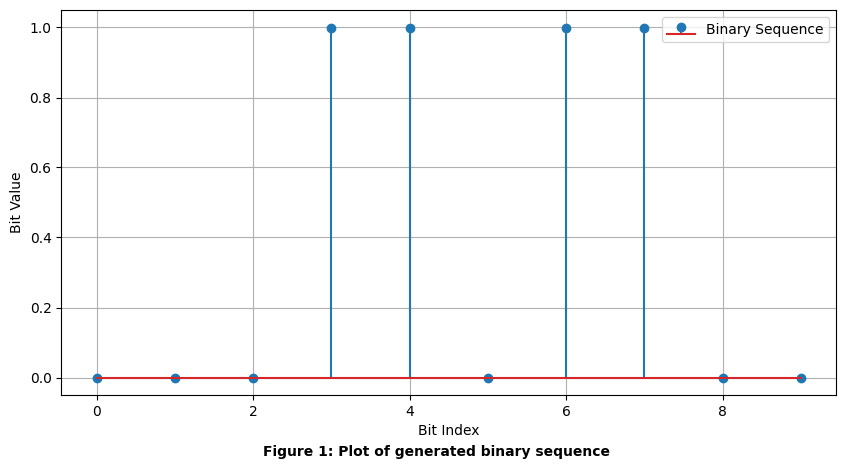

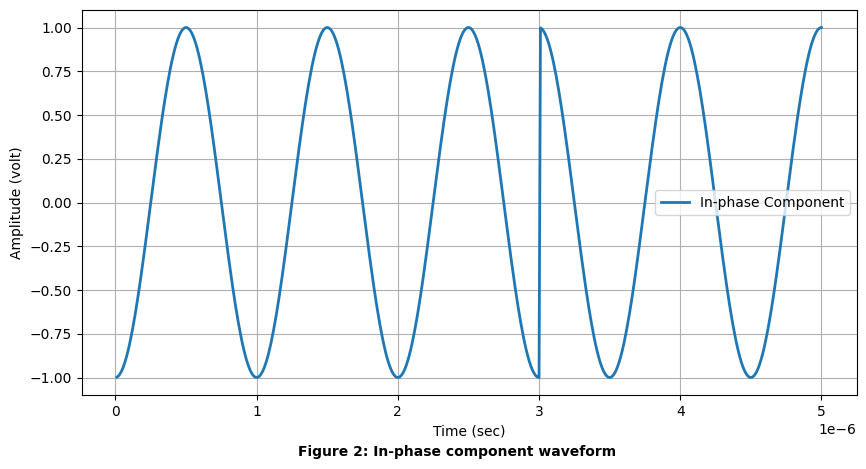

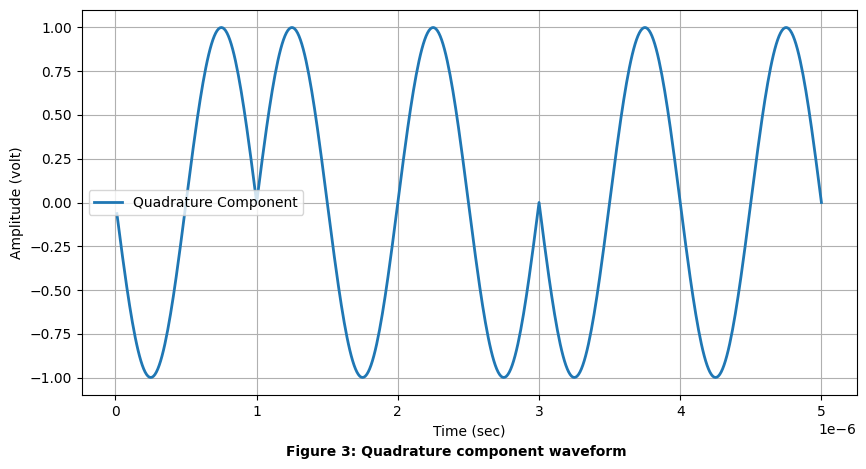

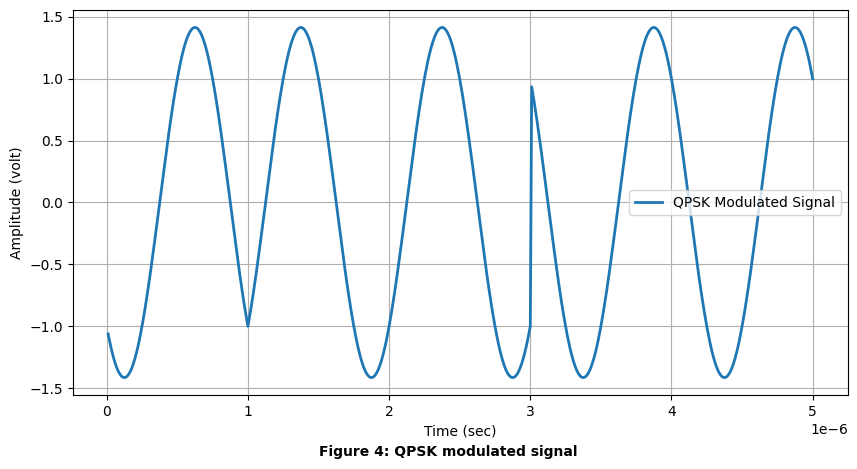

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define data sequence
data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0])  # Binary information

# Plotting the binary sequence
plt.figure(figsize=(10, 5))
plt.stem(data, label='Binary Sequence')
plt.grid(True)
plt.xlabel('Bit Index', size=10)
plt.ylabel('Bit Value', size=10)
plt.figtext(0.5, 0.01, 'Figure 1: Plot of generated binary sequence', ha='center', va='top', fontsize=10, color='k', weight='bold')
plt.legend()
plt.show()

# Convert data to Non-Return to Zero (NRZ) format for QPSK modulation
data_NRZ = 2 * data - 1

# Serial to Parallel conversion of data
s_p_data = data_NRZ.reshape(2, len(data) // 2)

# Transmission parameters
bit_rate = 10**6  # Bit rate
carrier_freq = bit_rate  # Minimum carrier frequency
bit_duration = 1 / bit_rate  # Bit duration
time_vector = np.linspace(bit_duration / 99, bit_duration, 100)  # Time vector for one bit information

# QPSK Modulation
in_phase_signal = []
quadrature_signal = []
transmitting_signal = np.array([])
for i in range(len(data) // 2):
    in_phase = s_p_data[0, i] * np.cos(2 * np.pi * carrier_freq * time_vector)  # In-phase component
    quadrature = s_p_data[1, i] * np.sin(2 * np.pi * carrier_freq * time_vector)  # Quadrature component

    in_phase_signal.extend(in_phase.tolist())  # In-phase signal vector
    quadrature_signal.extend(quadrature.tolist())  # Quadrature signal vector
    transmitting_signal = np.concatenate((transmitting_signal, (in_phase + quadrature)))

time_vector_transmit = np.linspace(bit_duration / 99, bit_duration * len(data) / 2, len(in_phase_signal))

# Plotting In-phase component waveform
plt.figure(figsize=(10, 5))
plt.plot(time_vector_transmit, in_phase_signal, linewidth=2, label='In-phase Component')
plt.grid(True)
plt.xlabel('Time (sec)', size=10)
plt.ylabel('Amplitude (volt)', size=10)
plt.figtext(0.5, 0.01, 'Figure 2: In-phase component waveform', ha='center', va='top', fontsize=10, color='k', weight='bold')
plt.legend()
plt.show()

# Plotting Quadrature component waveform
plt.figure(figsize=(10, 5))
plt.plot(time_vector_transmit, quadrature_signal, linewidth=2, label='Quadrature Component')
plt.grid(True)
plt.xlabel('Time (sec)', size=10)
plt.ylabel('Amplitude (volt)', size=10)
plt.figtext(0.5, 0.01, 'Figure 3: Quadrature component waveform', ha='center', va='top', fontsize=10, color='k', weight='bold')
plt.legend()
plt.show()

# Plotting QPSK modulated signal
plt.figure(figsize=(10, 5))
plt.plot(time_vector_transmit, transmitting_signal, linewidth=2, label='QPSK Modulated Signal')
plt.grid(True)
plt.xlabel('Time (sec)', size=10)
plt.ylabel('Amplitude (volt)', size=10)
plt.figtext(0.5, 0.01, 'Figure 4: QPSK modulated signal', ha='center', va='top', fontsize=10, color='k', weight='bold')
plt.legend()
plt.show()
